In [2]:
import networkx as nx
from bokeh.io import show, output_file
from bokeh.plotting import figure,show
from bokeh.models.graphs import from_networkx #I haven't been able to use this!
from bokeh.io import output_notebook, export_png
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.resources import CDN
from bokeh.embed import file_html
from math import sqrt
import csv
from csv import reader

all_nodes = []
with open('sample-graph.csv', 'r', encoding='utf-8-sig') as f:
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        unique_row_items = set(field.strip() for field in row)
        for item in unique_row_items:
            if item not in all_nodes:
                all_nodes.append(item)

with open('sample-graph.csv', 'r', encoding='utf-8-sig') as read_obj:
    csv_reader = reader(read_obj)
    all_edges = list(map(tuple, csv_reader))

G = nx.Graph()
G.add_nodes_from(all_nodes,color= 'green')  
#G.add_nodes_from(Dataset2,color='blue') 
G.add_edges_from(all_edges,weight=0.5)
layout = nx.draw_spring(G, with_labels=True)
nx.write_graphml(G,"TEST.graphML")
network = nx.read_graphml("TEST.graphML")

plot = figure(title="Resized Node Demo", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

# Graph renderer using nx
graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))

# Style node
graph.node_renderer.glyph = plot.circle(size='node_size', fill_color={'field': 'node_color', 'transform': mapper})


plot.renderers.append(graph)

output_notebook()
#output_file("networkx_graph.html")
show(plot)

# #start Bokeh code
# layout = nx.spring_layout(network,k=1.1/sqrt(network.number_of_nodes()),iterations=100) #pass the NX file to a spring layout

# nodes, nodes_coordinates = zip(*sorted(layout.items()))
# nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
# nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,name=nodes)) #Can this pass the color? 

# hover = HoverTool(tooltips=[('name', '@name')]) #would like to know how to add in more values here manually

# plot = figure(plot_width=2000, plot_height=200,tools=['tap', hover, 'box_zoom', 'reset'])

# r_circles = plot.circle('x', 'y', source=nodes_source, size=10, color='orange', level = 'overlay')#this function sets the color of the nodes, but how to set based on the name of the node? 


# def get_edges_specs(_network, _layout): 
#     d = dict(xs=[], ys=[], alphas=[])
#     weights = [d['weight'] for u, v, d in _network.edges(data=True)]
#     max_weight = max(weights)
#     calc_alpha = lambda h: 0.1 + 0.6 * (h / max_weight)

#     # example: { ..., ('user47', 'da_bjoerni', {'weight': 3}), ... }
#     for u, v, data in _network.edges(data=True):
#         d['xs'].append([_layout[u][0], _layout[v][0]])
#         d['ys'].append([_layout[u][1], _layout[v][1]])
#         d['alphas'].append(calc_alpha(data['weight']))
#     return d

# lines_source = ColumnDataSource(get_edges_specs(network, layout))

# r_lines = plot.multi_line('xs', 'ys', line_width=1,
#                       alpha='alphas', color='navy',
#                       source=lines_source)#This function sets the color of the edges

# show(plot)
# #export_png(plot, filename="plot.png")

NameError: name 'reader' is not defined

NameError: name 'sqrt' is not defined

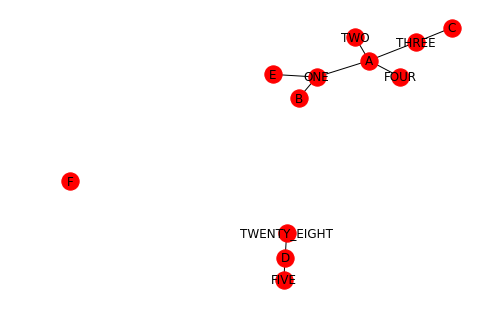

In [38]:
import networkx as nx
from bokeh.io import show, output_file
from bokeh.plotting import figure,show
from bokeh.models.graphs import from_networkx #I haven't been able to use this!
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.resources import CDN
from bokeh.embed import file_html
import pandas as pd
from csv import reader
import csv

Dataset1 = ['A','B','C','D','E','F']
Dataset2 = ['ONE','TWO','THREE','FOUR','FIVE','TWENTY_EIGHT']
Edgelist = [('A','ONE'),('B','ONE'),('E','ONE'),('A','TWO'),('A','THREE'),('A','FOUR'),('C','THREE'),('D','FIVE'),('D',"TWENTY_EIGHT")]
G = nx.Graph()
G.add_nodes_from(Dataset1,color= 'green')  
G.add_nodes_from(Dataset2,color='blue') 
G.add_edges_from(Edgelist,weight=0.8)
layout = nx.draw_spring(G, with_labels=True)
nx.write_graphml(G,"TEST.graphML")
network = nx.read_graphml("TEST.graphML")

#start Bokeh code
layout = nx.spring_layout(network,k=1/sqrt(network.number_of_nodes()),iterations=100) #pass the NX file to a spring layout

nodes, nodes_coordinates = zip(*sorted(layout.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,name=nodes)) #Can this pass the color? 

node_color=pd.DataFrame.from_dict({k:v for k,v in network.nodes(data=True)},orient='index').color.tolist()
color = tuple(node_color)                               
                                                       
hover = HoverTool(tooltips=[('name', '@name')]) #would like to know how to add in more values here manually

plot = figure(plot_width=800, plot_height=400,tools=['tap', hover, 'box_zoom', 'reset'])

r_circles = plot.circle('x', 'y', source=nodes_source, size=10,fill_color="_color_", level = 'overlay') 


def get_edges_specs(_network, _layout): 
    d = dict(xs=[], ys=[], alphas=[])
    weights = [d['weight'] for u, v, d in _network.edges(data=True)]
    max_weight = max(weights)
    calc_alpha = lambda h: 0.1 + 0.6 * (h / max_weight)
    for u, v, data in _network.edges(data=True):
        d['xs'].append([_layout[u][0], _layout[v][0]])
        d['ys'].append([_layout[u][1], _layout[v][1]])
        d['alphas'].append(calc_alpha(data['weight']))
    return d

lines_source = ColumnDataSource(get_edges_specs(network, layout))

r_lines = plot.multi_line('xs', 'ys', line_width=1.5,
                      alpha='alphas', color='navy',
                      source=lines_source)#This function sets the color of the edges

show(plot)

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns

from bokeh.io import show, output_notebook  #output_file,
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx

from bokeh.models import GraphRenderer, StaticLayoutProvider, LinearColorMapper, ColumnDataSource, Circle
from bokeh.palettes import Spectral8, Spectral4
from math import sqrt


G = nx.karate_club_graph()

# Some Random index
node_color = {k:v for k, v  in enumerate(np.random.uniform(low=0, high=21, size=(G.number_of_nodes(),)).round(1))}

#just to make the sizes visible
node_size = {k:5*v for k,v in G.degree()} 


nx.set_node_attributes(G, 'node_size', node_size)
source=ColumnDataSource(pd.DataFrame.from_dict({k:v for k,v in G.nodes(data=True)},orient='index'))
mapper = LinearColorMapper(palette=pal_hex_lst, low=0, high=21)

### Initiate bokeh plot
plot = figure(title="Resized Node Demo", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
          tools="", toolbar_location=None)

# Graph renderer using nx
graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))

# Style node
graph.node_renderer.data_source = source
graph.node_renderer.glyph = Circle(size='node_size', fill_color={'field': 'node_color', 'transform': mapper})


plot.renderers.append(graph)

TypeError: unhashable type: 'dict'

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

In [3]:
import networkx as nx
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx
import csv
from csv import reader

#output_notebook()

all_nodes = []
with open('sample-graph.csv', 'r', encoding='utf-8-sig') as f:
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        unique_row_items = set(field.strip() for field in row)
        for item in unique_row_items:
            if item not in all_nodes:
                all_nodes.append(item)

with open('sample-graph.csv', 'r', encoding='utf-8-sig') as read_obj:
    csv_reader = reader(read_obj)
    all_edges = list(map(tuple, csv_reader))

G = nx.Graph()
G.add_nodes_from(all_nodes,color= 'green')  
#G.add_nodes_from(Dataset2,color='blue') 
G.add_edges_from(all_edges)

#G.add_edges_from(Edgelist)

# create the plot
plot = figure(x_range=(-1, 1), y_range=(-1, 1))

# add tools to the plot
plot.add_tools(HoverTool(tooltips=[("Concept", "@concept")]), 
               TapTool(), 
               BoxSelectTool())
# plot.add_tools(HoverTool(tooltips=[("Name", "@name"), 
#                                    ("Club", "@club")]), 
#                TapTool(), 
#                BoxSelectTool())

graph = from_networkx(G, nx.spring_layout, iterations=10, scale=1, center=(0,0))

graph.node_renderer.data_source.data['concept'] = list(G.nodes())

#graph.node_renderer.data_source.data['club'] = [i[1]['club'] for i in G.nodes(data=True)]

# set node size
graph.node_renderer.glyph = Circle(size=15)

plot.renderers.append(graph)
show(plot)

In [13]:
import networkx as nx
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral8
from math import log
import csv
from csv import reader

#output_notebook()

all_nodes = []
with open('sample-graph.csv', 'r', encoding='utf-8-sig') as f:
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        unique_row_items = set(field.strip() for field in row)
        for item in unique_row_items:
            if item not in all_nodes:
                all_nodes.append(item)

with open('sample-graph.csv', 'r', encoding='utf-8-sig') as read_obj:
    csv_reader = reader(read_obj)
    all_edges = list(map(tuple, csv_reader))

G = nx.Graph()
G.add_nodes_from(all_nodes,color= 'blue')  
G.add_edges_from(all_edges)

node_size = {k:5*v for k,v in G.degree()} 
nx.set_node_attributes(G, node_size, 'node_size')
# create the plot
plot = figure(x_range=(-1, 1), y_range=(-1, 1))

plot.add_tools(HoverTool(tooltips=[("Concept", "@concept"), 
                                   ("degree", "@degree")]), 
               TapTool(), 
               BoxSelectTool())

graph = from_networkx(G, nx.spring_layout, iterations=15, scale=1, center=(0,0))

graph.node_renderer.data_source.data['concept'] = list(G.nodes())

graph.node_renderer.data_source.data['degree'] = list(v for k,v in G.degree())
all_degrees = list(v for k,v in G.degree())
weighted_degrees = []
for degree in all_degrees:
    if degree < 4:
        weighted_degrees.append(7+degree)
    else:
        weighted_degrees.append(6*log(degree))
graph.node_renderer.data_source.data['size'] = list(v for v in weighted_degrees)


#graph.node_renderer.data_source.data['colors'] = Spectral8

#print(graph.node_renderer.data_source.data['degree'])
# set node size
from bokeh.transform import linear_cmap
graph.node_renderer.glyph = Circle(
    size='size', 
    fill_color=linear_cmap('degree', 'Spectral8', 0, 15)
)
plot.renderers.append(graph)
show(plot)

#important link: https://stackoverflow.com/questions/50420584/color-nodes-by-networkx-node-attribute-with-bokeh

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: degree [renderer: GlyphRenderer(id='b8db8ef7-7363-4030-9240-1de4e60d1053', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: degree [renderer: GlyphRenderer(id='8fa59346-36a0-40cd-a62b-6a5c0f29d3ec', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: degree [renderer: GlyphRenderer(id='28340b29-a67c-4127-b460-6b2b5e5ab55a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: degree [renderer: GlyphRenderer(id='c4c3c5e8-7a76-4617-99ba-f7bb20f30d59', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: degree, size [renderer: GlyphRenderer(id='03168d6e-8751-471f-ae3c-82ff2e7d27dc', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexist